---
<a name='title'></a>
# **<font color="#8397df"> Modelación Climática Tropical </font>**
### **<font color="#9dadea"> Precipitación Climatológica promedio del ensamble SPEAR</font>**


---

In [1]:
pip install xarray

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install cftime

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install h5netcdf

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install cartopy

Note: you may need to restart the kernel to use updated packages.


In [5]:
import xarray as xr
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature 
from cartopy.util import add_cyclic_point
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import glob

In [6]:
def mapa_MC(data, levels, ccmap, titulo, extend='max', cbarlabel='Precipitación [mm día$^{-1}$]', 
            limite_NS=75, lon_min=None, lon_max=None, lat_min=None, lat_max=None):
    lons, lats = data.lon, data.lat
    # para quitar linea blanca del medio
    data, lon = add_cyclic_point(data, coord=lons)
    fig = plt.figure(figsize=(12, 9))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()
    # plot de contorno, extend con max y no both
    cs = ax.contourf(lon, lats, data, levels=levels, cmap=ccmap, extend=extend, transform=ccrs.PlateCarree())

    # Definimos extensión del mapa
    if lon_min is not None and lon_max is not None and lat_min is not None and lat_max is not None:
        ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
    else:
        ax.set_extent([0, 359.1, -limite_NS, limite_NS], crs=ccrs.PlateCarree())

    # Agregamos lineas de paralelo y meridiano
    gl = ax.gridlines(draw_labels=True, color='gray', alpha=0.5, linestyle='--')
    # Añadimos líneas divisoras de estados
    ax.add_feature(cfeature.STATES.with_scale('10m'), edgecolor='k', linewidth=0.5)
    gl.top_labels = gl.right_labels = False
    gl.xlabel_style = {'size': 13}
    gl.ylabel_style = {'size': 13}
    plt.title(titulo, fontsize=18)
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.1)
    # agregar colorbar
    cbar = plt.colorbar(cs, orientation='horizontal', fraction=0.046, pad=0.06)
    cbar.ax.xaxis.label.set_size(16)  # tamaño del título de la cbar
    cbar.ax.tick_params(labelsize=16)  # tamaño de las etiquetas de la cbar
    cbar.ax.set_xlabel(cbarlabel)

In [7]:
#generar automaticamente la lista de archivos sin tener que escribirlos, los ordena
file_list = np.sort(glob.glob("/home/jovyan/ModClim/SPEAR/monthly*ens*.nc"))
print(file_list)

['/home/jovyan/ModClim/SPEAR/monthly_ens001.nc'
 '/home/jovyan/ModClim/SPEAR/monthly_ens002.nc'
 '/home/jovyan/ModClim/SPEAR/monthly_ens003.nc'
 '/home/jovyan/ModClim/SPEAR/monthly_ens004.nc'
 '/home/jovyan/ModClim/SPEAR/monthly_ens005.nc'
 '/home/jovyan/ModClim/SPEAR/monthly_ens006.nc'
 '/home/jovyan/ModClim/SPEAR/monthly_ens007.nc'
 '/home/jovyan/ModClim/SPEAR/monthly_ens008.nc'
 '/home/jovyan/ModClim/SPEAR/monthly_ens009.nc'
 '/home/jovyan/ModClim/SPEAR/monthly_ens010.nc'
 '/home/jovyan/ModClim/SPEAR/monthly_ens011.nc'
 '/home/jovyan/ModClim/SPEAR/monthly_ens012.nc'
 '/home/jovyan/ModClim/SPEAR/monthly_ens013.nc'
 '/home/jovyan/ModClim/SPEAR/monthly_ens014.nc'
 '/home/jovyan/ModClim/SPEAR/monthly_ens015.nc'
 '/home/jovyan/ModClim/SPEAR/monthly_ens016.nc'
 '/home/jovyan/ModClim/SPEAR/monthly_ens017.nc'
 '/home/jovyan/ModClim/SPEAR/monthly_ens018.nc'
 '/home/jovyan/ModClim/SPEAR/monthly_ens019.nc'
 '/home/jovyan/ModClim/SPEAR/monthly_ens020.nc'
 '/home/jovyan/ModClim/SPEAR/monthly_ens

In [8]:
# hacemos una lista para almacenar los datos de cada miembro 
ens_dlist = []

# ciclo para cada archivo (miembro)
for i, filename in enumerate(file_list):
    # Open the dataset
    ds = xr.open_dataset(filename)
    pr = ds['precip'] * 86400  # Convertir a mm/dia
    pr['units'] = 'mm day-1'

    # Selección de meses JJAS
    pr_jjas = pr.where((pr.time.dt.month >= 6) & (pr.time.dt.month <= 9), drop=True)
    pr_climatology = pr_jjas.sel(time=slice('1980', '2010')).mean('time')

    # Se añade la coordenada del ensamble
    pr_climatology = pr_climatology.assign_coords(ens=i + 1) 
    ens_dlist.append(pr_climatology)
    
    # Append de los datos a la lista original
ens_combined = xr.concat(ens_dlist, dim='ens')

# Concatena todos los miembros en la dimensión 'ens' 
ens_mean = ens_combined.mean(dim='ens')

In [9]:
# Guardar los datos seleccionados JJAS en un archivo NetCDF
#ens_mean.to_netcdf('SPEAR_ens80_ClimJJAS.nc')
#ens_mean.to_netcdf('SPEAR_ens_completo_ClimJJAS.nc')

In [10]:
# Seleccionamos la ubicación de todo México:
centrolat_ens_jjas=ens_mean.sel(lat=slice(9.25,33.25))
ens_jjas=centrolat_ens_jjas.sel(lon=slice(242,275.75))

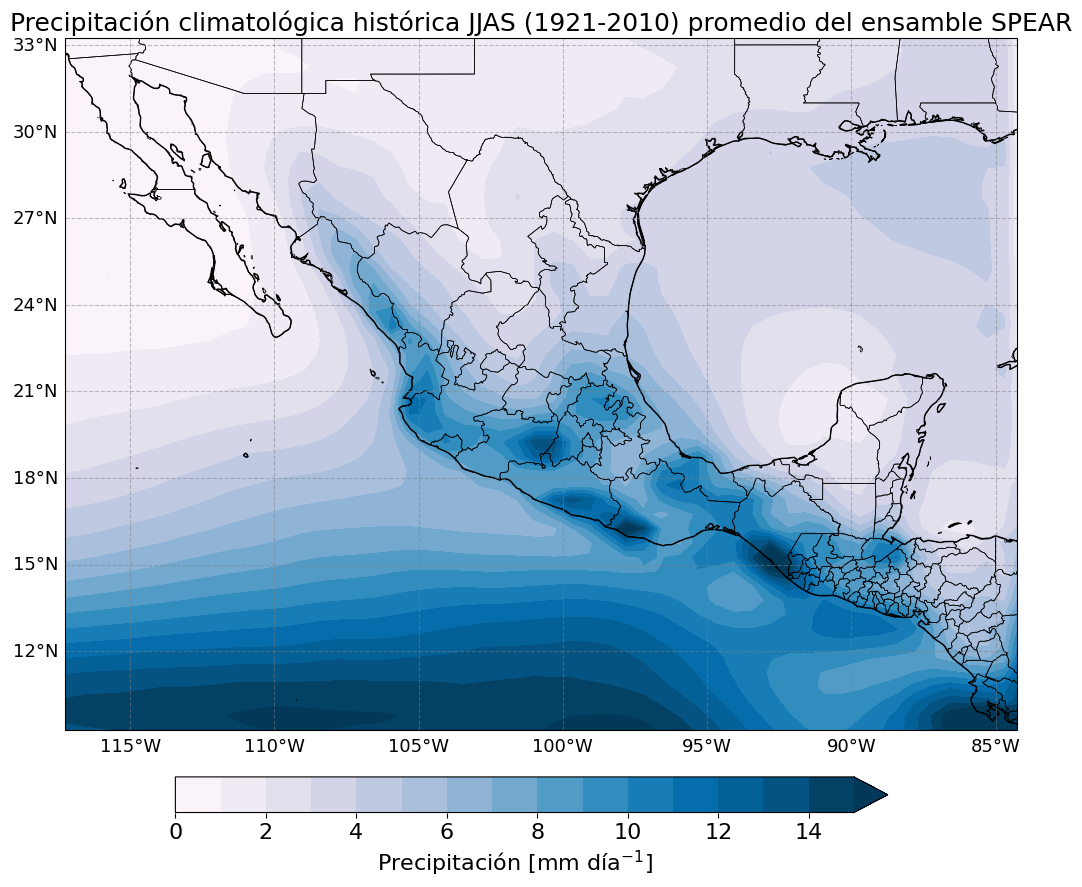

In [11]:
mapa_MC(ens_jjas, np.arange(0,16,1), 'PuBu', 'Precipitación climatológica histórica JJAS (1921-2010) promedio del ensamble SPEAR', 
        lon_min=242.75, lon_max=275.75, lat_min=9.25, lat_max=33.25)

In [12]:
# Valores máximos y mínimos de la precipitación en el dominio anterior
print(np.nanmin(ens_jjas), np.nanmax(ens_jjas))

0.14036661 22.735601


In [13]:
# Cargamos los archivos NetCDF
ds1 = xr.open_dataset('SPEAR_ens80_ClimJJAS.nc')
ds2 = xr.open_dataset('SPEAR_ens_completo_ClimJJAS.nc')

# Calculamos la diferencia entre periodos
diff = ds1['precip'] - ds2['precip']

# Guardamos la diferencia en un nuevo archivo NetCDF
#diff.to_netcdf('Diferencia_SPEAR_ClimJJAS.nc')

# Mostramos la diferencia
print(diff)

<xarray.DataArray 'precip' (lat: 90, lon: 104)> Size: 37kB
array([[ 2.4212897e-04,  1.6163290e-04,  1.9989908e-04, ...,
        -1.2441206e-01, -1.3677120e-01, -1.7144799e-01],
       [ 7.1953237e-04,  6.9119036e-04,  5.4144859e-04, ...,
        -1.1515689e-01, -1.2348509e-01, -1.7178559e-01],
       [ 1.3222247e-03,  1.3242364e-03,  1.0707229e-03, ...,
        -8.9952946e-02, -9.4722271e-02, -1.3746691e-01],
       ...,
       [-9.3682528e-02, -1.1136401e-01, -9.7476721e-02, ...,
        -4.7061443e-02, -3.4343243e-02, -2.3603916e-02],
       [-7.7686667e-02, -8.7631464e-02, -9.8415613e-02, ...,
        -3.3139229e-02, -2.9069901e-02, -2.2346497e-02],
       [-7.7759027e-02, -9.0837121e-02, -1.0104334e-01, ...,
        -1.9404411e-02, -2.8566837e-02, -2.7258396e-02]], dtype=float32)
Coordinates:
  * lat      (lat) float64 720B -0.75 -0.25 0.25 0.75 ... 42.75 43.25 43.75
  * lon      (lon) float64 832B 235.3 235.9 236.6 237.2 ... 298.4 299.1 299.7
    units    <U8 32B 'mm day-1'


In [14]:
print(np.nanmin(diff), np.nanmax(diff))

-1.08881 0.5748806
